## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cluster
import random

import statsmodels.api as sm
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix



# Import Data

In [ ]:
data2020 = pd.read_csv('drive/MyDrive/UFOP - Ananda/Eletivas/Reconhecimento de Padrões/INFLUD20-23-05-2022.csv', sep=';', encoding='utf-8')
data2021 = pd.read_csv('drive/MyDrive/UFOP - Ananda/Eletivas/Reconhecimento de Padrões/INFLUD21-23-05-2022.csv', sep=';', encoding='utf-8')
data2022 = pd.read_csv('drive/MyDrive/UFOP - Ananda/Eletivas/Reconhecimento de Padrões/INFLUD22-23-05-2022.csv', sep=';', encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,59,61,62,63,91,93,105,114,116,117,118,122,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,59,61,62,63,66,91,93,105,122) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Functions

In [ ]:
# Transformando o valor ignorado em algum valor aleatório
def handle_raca(value):
  if value == 9:
    return random.choices([1,2,4], weights=[2, 1, 0.5], k=1)[0]
  else: return value

In [ ]:
# Separando os estados por região
def parse_estados(value):
  if('AC' == value): return 1;
  elif('AL' == value): return 2;
  elif('AP' == value): return 1;
  elif('AM' == value): return 1;
  elif('BA' == value): return 2;
  elif('CE' == value): return 2;
  elif('DF' == value): return 4;
  elif('ES' == value): return 5;
  elif('GO' == value): return 4;
  elif('MA' == value): return 2;
  elif('MT' == value): return 4;
  elif('MS' == value): return 4;
  elif('MG' == value): return 5;
  elif('PA' == value): return 1;
  elif('PB' == value): return 2;
  elif('PR' == value): return 3;
  elif('PE' == value): return 2;
  elif('PI' == value): return 2;
  elif('RJ' == value): return 5;
  elif('RN' == value): return 2;
  elif('RS' == value): return 3;
  elif('RO' == value): return 1;
  elif('RR' == value): return 1;
  elif('SC' == value): return 3;
  elif('SP' == value): return 5;
  elif('SE' == value): return 2;
  elif('TO'== value): return 1;

# Clean Data

In [ ]:
# Selecionando apenas as colunas necessárias

data1 = data2020[["CS_SEXO", "NU_IDADE_N", "CS_RACA", "CS_ESCOL_N", "SG_UF", \
      "CS_ZONA", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "SATURACAO", "DIARREIA", "VOMITO", "DOR_ABD", "FADIGA", "PERD_OLFT", \
      "PERD_PALA", "OUTRO_SIN", "CARDIOPATI", "SIND_DOWN", "ASMA", \
      "DIABETES", "NEUROLOGIC", "RENAL", "CLASSI_FIN", "EVOLUCAO"]]

data2 = data2021[["CS_SEXO", "NU_IDADE_N", "CS_RACA", "CS_ESCOL_N", "SG_UF", \
      "CS_ZONA", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "SATURACAO", "DIARREIA", "VOMITO", "DOR_ABD", "FADIGA", "PERD_OLFT", \
      "PERD_PALA", "OUTRO_SIN", "CARDIOPATI", "SIND_DOWN", "ASMA", \
      "DIABETES", "NEUROLOGIC", "RENAL", "CLASSI_FIN", "EVOLUCAO"]]

data3 = data2022[["CS_SEXO", "NU_IDADE_N", "CS_RACA", "CS_ESCOL_N", "SG_UF", \
      "CS_ZONA", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "SATURACAO", "DIARREIA", "VOMITO", "DOR_ABD", "FADIGA", "PERD_OLFT", \
      "PERD_PALA", "OUTRO_SIN", "CARDIOPATI", "SIND_DOWN", "ASMA", \
      "DIABETES", "NEUROLOGIC", "RENAL", "CLASSI_FIN", "EVOLUCAO"]]

In [ ]:
# Só quem foi diagnosticado com COVID-19

data1 = data1[data1['CLASSI_FIN'] == 5]
data2 = data2[data2['CLASSI_FIN'] == 5]
data3 = data3[data3['CLASSI_FIN'] == 5]

In [ ]:
data = pd.concat([data1, data2, data3])

In [ ]:
# Separando as pessoas por idades 

bins = [0, 12, 20, 40, 65, 120]
labels = [1, 2, 3, 4, 5]
data['FAIXA_ETARIA'] = pd.cut(data['NU_IDADE_N'], bins=bins, labels=labels)
data.dropna(subset=['FAIXA_ETARIA'], inplace=True)

data.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,SG_UF,CS_ZONA,FEBRE,TOSSE,GARGANTA,DISPNEIA,...,OUTRO_SIN,CARDIOPATI,SIND_DOWN,ASMA,DIABETES,NEUROLOGIC,RENAL,CLASSI_FIN,EVOLUCAO,FAIXA_ETARIA
26,M,57,NaN,NaN,SP,1.0,1.0,1.0,2.0,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,4
31,M,79,9.0,9.0,SP,NaN,1.0,1.0,2.0,1.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,5
35,F,61,NaN,NaN,SP,NaN,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,4
38,M,60,1.0,NaN,SP,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,2.0,4
63,F,54,1.0,9.0,SP,1.0,1.0,1.0,2.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,4


In [ ]:
# Tirar o que for nulo nas seguintes colunas 
data.dropna(subset=['CS_SEXO', 'SG_UF', 'EVOLUCAO', 'CS_ZONA'], inplace=True)

# Transformando as colunas para atributos numéricos
data["CS_SEXO"] = data["CS_SEXO"].map({"M":0, "F":1})
data["RENAL"] = data["RENAL"].map({1:1, 2:2, 9:2, None:2})
data["FEBRE"] = data["FEBRE"].map({1:1, 2:2, 9:2, None:2})
data["TOSSE"] = data["TOSSE"].map({1:1, 2:2, 9:2, None:2})
data["OUTRO_SIN"] = data["OUTRO_SIN"].map({1:1, 2:2, 9:2, None:2})
data["PERD_PALA"] = data["PERD_PALA"].map({1:1, 2:2, 9:2, None:2})
data["PERD_OLFT"] = data["PERD_OLFT"].map({1:1, 2:2, 9:2, None:2})
data["ASMA"] = data["ASMA"].map({1:1, 2:2, 9:2, None:2})
data["DIABETES"] = data["DIABETES"].map({1:1, 2:2, 9:2, None:2})
data["SIND_DOWN"] = data["SIND_DOWN"].map({1:1, 2:2, 9:2, None:2})
data["CARDIOPATI"] = data["CARDIOPATI"].map({1:1, 2:2, 9:2, None:2})
data["DOR_ABD"] = data["DOR_ABD"].map({1:1, 2:2, 9:2, None:2})
data["FADIGA"] = data["FADIGA"].map({1:1, 2:2, 9:2, None:2})
data["GARGANTA"] = data["GARGANTA"].map({1:1, 2:2, 9:2, None:2})
data["DISPNEIA"] = data["DISPNEIA"].map({1:1, 2:2, 9:2, None:2})
data["DIARREIA"] = data["DIARREIA"].map({1:1, 2:2, 9:2, None:2})
data["SATURACAO"] = data["SATURACAO"].map({1:1, 2:2, 9:2, None:2})
data["VOMITO"] = data["VOMITO"].map({1:1, 2:2, 9:2, None:2})
data["NEUROLOGIC"] = data["NEUROLOGIC"].map({1:1, 2:2, 9:2, None:2})
data["CS_ESCOL_N"] = data["CS_ESCOL_N"].map({0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 9:5, None:5})

# Se a raça aparecer como ignorado será realocado para maior proporção do Brasil (pardos)
data["CS_RACA"] = data["CS_RACA"].map({1:1, 2:2, 3:3, 4:4, 5:5, 9:9, None:4})

data.dropna(subset=['CS_SEXO'], inplace=True)
data.drop(data[data['EVOLUCAO'] == 9].index, inplace=True)
data.drop(data[data['CS_ZONA'] == 9].index, inplace=True)
data.drop(columns=['CLASSI_FIN', 'NU_IDADE_N'], inplace=True)

data['CS_RACA'] = data.apply(lambda x: handle_raca(x['CS_RACA']), axis=1)
data['SG_UF'] = data.apply(lambda x: parse_estados(x['SG_UF']), axis=1)

data.head()

,CS_SEXO,CS_RACA,CS_ESCOL_N,SG_UF,CS_ZONA,FEBRE,TOSSE,GARGANTA,DISPNEIA,SATURACAO,...,PERD_PALA,OUTRO_SIN,CARDIOPATI,SIND_DOWN,ASMA,DIABETES,NEUROLOGIC,RENAL,EVOLUCAO,FAIXA_ETARIA
26,0.0,4,5,5,1.0,1,1,2,2,1,...,2,2,2,2,2,2,2,2,1.0,4
38,0.0,1,5,5,1.0,1,1,1,1,1,...,2,2,2,2,2,1,2,2,2.0,4
63,1.0,1,5,5,1.0,1,1,2,1,1,...,2,2,1,2,2,2,2,2,2.0,4
64,0.0,1,3,5,1.0,1,1,1,1,2,...,2,2,1,2,2,1,2,2,2.0,5
78,0.0,1,2,5,1.0,1,1,2,1,1,...,2,2,1,2,2,1,2,2,2.0,5


# Tables

## Pessoa

### Sexo

In [ ]:
mulheres_totais = data.loc[data.CS_SEXO == 1]['CS_SEXO']
#mulheres_curadas = data.loc[(data.CS_SEXO == False) & (data.EVOLUCAO == 1)]['CS_SEXO']
#mulheres_obito = data.loc[(data.CS_SEXO == False) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['CS_SEXO']

homens_totais = data.loc[data.CS_SEXO == 0]['CS_SEXO']

taxa_mulheres_totais = round(len(mulheres_totais)/len(data) * 100, 2)
#taxa_mulheres_curadas = round(len(mulheres_curadas)/len(mulheres_totais) * 100, 2)
#taxa_mulheres_obito = round(len(mulheres_obito)/len(mulheres_totais) * 100, 2)

print("Nº Absoluto (Mulheres Totais): ", len(mulheres_totais))
print("% (Mulheres): ", taxa_mulheres_totais)

taxa_homens_totais = round(len(homens_totais)/len(data) * 100, 2)

print ("Nº Absoluto (Homens Totais): ", len(homens_totais))
print("% (Homens): ", taxa_homens_totais)


#print("\nNº Absoluto (Mulheres Curadas): ", len(mulheres_curadas))
#print("% (Mulheres Curadas): ", taxa_mulheres_curadas)

#print("\nNº Absoluto (Mulheres Óbito): ", len(mulheres_obito))
#print("% (Mulheres Óbito): ", taxa_mulheres_obito)

Nº Absoluto (Mulheres Totais):  731914
% (Mulheres):  44.63
Nº Absoluto (Homens Totais):  907879
% (Homens):  55.37


### Idade

In [ ]:
faixa_etaria_65_120 = data.loc[data.FAIXA_ETARIA == 5]['FAIXA_ETARIA']
faixa_etaria_65_120_curados = data.loc[(data.FAIXA_ETARIA == 5) & (data.EVOLUCAO == 1)]['FAIXA_ETARIA']
faixa_etaria_65_120_obitos = data.loc[(data.FAIXA_ETARIA == 5) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['FAIXA_ETARIA']

taxa_faixa_etaria_65_120 = round(len(faixa_etaria_65_120)/len(data) * 100, 2)
taxa_faixa_etaria_65_120_curados = round(len(faixa_etaria_65_120_curados)/len(faixa_etaria_65_120) * 100, 2)
taxa_faixa_etaria_65_120_obitos = round(len(faixa_etaria_65_120_obitos)/len(faixa_etaria_65_120) * 100, 2)

print("65 - 120 anos")
print("Nº Absoluto (faixa_etaria_65_120 Totais): ", len(faixa_etaria_65_120))
print("% (faixa_etaria_65_120 Totais): ", taxa_faixa_etaria_65_120)

print("\nNº Absoluto (faixa_etaria_65_120 Curadas): ", len(faixa_etaria_65_120_curados))
print("% (faixa_etaria_65_120 Curadas): ", taxa_faixa_etaria_65_120_curados)

print("\nNº Absoluto (faixa_etaria_65_120 Óbito): ", len(faixa_etaria_65_120_obitos))
print("% (faixa_etaria_65_120 Óbito): ", taxa_faixa_etaria_65_120_obitos)

65 - 120 anos
Nº Absoluto (faixa_etaria_65_120 Totais):  601454
% (faixa_etaria_65_120 Totais):  36.68

Nº Absoluto (faixa_etaria_65_120 Curadas):  288806
% (faixa_etaria_65_120 Curadas):  48.02

Nº Absoluto (faixa_etaria_65_120 Óbito):  312648
% (faixa_etaria_65_120 Óbito):  51.98


### Raça

In [ ]:
# 1 - branco  | 2 - preto | 3 - amarelo | 4 - pardo | 5 - indigena
raca = data.loc[data.CS_RACA == 5]['CS_RACA']
raca_curados = data.loc[(data.CS_RACA == 5) & (data.EVOLUCAO == 1)]['CS_RACA']
raca_obitos = data.loc[(data.CS_RACA == 5) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['CS_RACA']

taxa_raca = round(len(raca)/len(data) * 100, 2)
taxa_raca_curados = round(len(raca_curados)/len(raca) * 100, 2)
taxa_raca_obitos = round(len(raca_obitos)/len(raca) * 100, 2)

print("indigenas")
print("Nº Absoluto (indigena Totais): ", len(raca))
print("% (indigena Totais): ", taxa_raca)

print("\nNº Absoluto (indigena Curadas): ", len(raca_curados))
print("% (indigena Curadas): ", taxa_raca_curados)

print("\nNº Absoluto (indigena Óbito): ", len(raca_obitos))
print("% (indigena Óbito): ", taxa_raca_obitos)

indigenas
Nº Absoluto (indigena Totais):  3364
% (indigena Totais):  0.21

Nº Absoluto (indigena Curadas):  2118
% (indigena Curadas):  62.96

Nº Absoluto (indigena Óbito):  1246
% (indigena Óbito):  37.04


## COMORBIDADES

### Cardiopatia

In [ ]:
# 1 - SIM   |   2 - NAO
cardiopatia = data.loc[data.CARDIOPATI == 2]['CARDIOPATI']
cardiopatia_curados = data.loc[(data.CARDIOPATI == 2) & (data.EVOLUCAO == 1)]['CARDIOPATI']
cardiopatia_obitos = data.loc[(data.CARDIOPATI == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['CARDIOPATI']

taxa_cardiopatia = round(len(cardiopatia)/len(data) * 100, 2)
taxa_cardiopatia_curados = round(len(cardiopatia_curados)/len(cardiopatia) * 100, 2)
taxa_cardiopatia_obitos = round(len(cardiopatia_obitos)/len(cardiopatia) * 100, 2)

print("NAO POSSUI CARDIOPATIA")
print("Nº Absoluto (cardiopatia_NAO Totais): ", len(cardiopatia))
print("% (cardiopatia_NAO Totais): ", taxa_cardiopatia)

print("\nNº Absoluto (cardiopatia_NAO Curadas): ", len(cardiopatia_curados))
print("% (cardiopatia_NAO Curadas): ", taxa_cardiopatia_curados)

print("\nNº Absoluto (cardiopatia_NAO Óbito): ", len(cardiopatia_obitos))
print("% (cardiopatia_NAO Óbito): ", taxa_cardiopatia_obitos)

NAO POSSUI CARDIOPATIA
Nº Absoluto (cardiopatia_NAO Totais):  1121487
% (cardiopatia_NAO Totais):  68.39

Nº Absoluto (cardiopatia_NAO Curadas):  788370
% (cardiopatia_NAO Curadas):  70.3

Nº Absoluto (cardiopatia_NAO Óbito):  333117
% (cardiopatia_NAO Óbito):  29.7


### Síndrome de Down

In [ ]:
# 1 - SIM   |   2 - NAO
sindrome_down = data.loc[data.SIND_DOWN == 2]['SIND_DOWN']
sindrome_down_curados = data.loc[(data.SIND_DOWN == 2) & (data.EVOLUCAO == 1)]['SIND_DOWN']
sindrome_down_obitos = data.loc[(data.SIND_DOWN == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['SIND_DOWN']

taxa_sindrome_down = round(len(sindrome_down)/len(data) * 100, 2)
taxa_sindrome_down_curados = round(len(sindrome_down_curados)/len(sindrome_down) * 100, 2)
taxa_sindrome_down_obitos = round(len(sindrome_down_obitos)/len(sindrome_down) * 100, 2)

print("NAO POSSUI sindrome_down")
print("Nº Absoluto (sindrome_down_NAO Totais): ", len(sindrome_down))
print("% (sindrome_down_NAO Totais): ", taxa_sindrome_down)

print("\nNº Absoluto (sindrome_down_NAO Curadas): ", len(sindrome_down_curados))
print("% (sindrome_down_NAO Curadas): ", taxa_sindrome_down_curados)

print("\nNº Absoluto (sindrome_down_NAO Óbito): ", len(sindrome_down_obitos))
print("% (sindrome_down_NAO Óbito): ", taxa_sindrome_down_obitos)

NAO POSSUI sindrome_down
Nº Absoluto (sindrome_down_NAO Totais):  1635266
% (sindrome_down_NAO Totais):  99.72

Nº Absoluto (sindrome_down_NAO Curadas):  1078297
% (sindrome_down_NAO Curadas):  65.94

Nº Absoluto (sindrome_down_NAO Óbito):  556969
% (sindrome_down_NAO Óbito):  34.06


### Diabetes

In [ ]:
# 1 - SIM   |   2 - NAO
diabetes = data.loc[data.DIABETES == 2]['DIABETES']
diabetes_curados = data.loc[(data.DIABETES == 2) & (data.EVOLUCAO == 1)]['DIABETES']
diabetes_obitos = data.loc[(data.DIABETES == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['DIABETES']

taxa_diabetes = round(len(diabetes)/len(data) * 100, 2)
taxa_diabetes_curados = round(len(diabetes_curados)/len(diabetes) * 100, 2)
taxa_diabetes_obitos = round(len(diabetes_obitos)/len(diabetes) * 100, 2)

print("NAO POSSUI diabetes")
print("Nº Absoluto (diabetes_NAO Totais): ", len(diabetes))
print("% (diabetes_NAO Totais): ", taxa_diabetes)

print("\nNº Absoluto (diabetes_NAO Curadas): ", len(diabetes_curados))
print("% (diabetes_NAO Curadas): ", taxa_diabetes_curados)

print("\nNº Absoluto (diabetes_NAO Óbito): ", len(diabetes_obitos))
print("% (diabetes_NAO Óbito): ", taxa_diabetes_obitos)

NAO POSSUI diabetes
Nº Absoluto (diabetes_NAO Totais):  1270006
% (diabetes_NAO Totais):  77.45

Nº Absoluto (diabetes_NAO Curadas):  875359
% (diabetes_NAO Curadas):  68.93

Nº Absoluto (diabetes_NAO Óbito):  394647
% (diabetes_NAO Óbito):  31.07


### Renal

In [ ]:
# 1 - SIM   |   2 - NAO
renal = data.loc[data.RENAL == 2]['RENAL']
renal_curados = data.loc[(data.RENAL == 2) & (data.EVOLUCAO == 1)]['RENAL']
renal_obitos = data.loc[(data.RENAL == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['RENAL']

taxa_renal = round(len(renal)/len(data) * 100, 2)
taxa_renal_curados = round(len(renal_curados)/len(renal) * 100, 2)
taxa_renal_obitos = round(len(renal_obitos)/len(renal) * 100, 2)

print("NAO POSSUI renal")
print("Nº Absoluto (NAO_renal Totais): ", len(renal))
print("% (NAO_renal Totais): ", taxa_renal)

print("\nNº Absoluto (NAO_renal Curadas): ", len(renal_curados))
print("% (NAO_renal Curadas): ", taxa_renal_curados)

print("\nNº Absoluto (NAO_renal Óbito): ", len(renal_obitos))
print("% (NAO_renal Óbito): ", taxa_renal_obitos)

NAO POSSUI renal
Nº Absoluto (NAO_renal Totais):  1585301
% (NAO_renal Totais):  96.68

Nº Absoluto (NAO_renal Curadas):  1057676
% (NAO_renal Curadas):  66.72

Nº Absoluto (NAO_renal Óbito):  527625
% (NAO_renal Óbito):  33.28


### Asma

In [ ]:
# 1 - SIM   |   2 - NAO
asma = data.loc[data.ASMA == 2]['ASMA']
asma_curados = data.loc[(data.ASMA == 2) & (data.EVOLUCAO == 1)]['ASMA']
asma_obitos = data.loc[(data.ASMA == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['ASMA']

taxa_asma = round(len(asma)/len(data) * 100, 2)
taxa_asma_curados = round(len(asma_curados)/len(asma) * 100, 2)
taxa_asma_obitos = round(len(asma_obitos)/len(asma) * 100, 2)

print("NAO POSSUI asma")
print("Nº Absoluto (NAO_asma Totais): ", len(asma))
print("% (NAO_asma Totais): ", taxa_asma)

print("\nNº Absoluto (NAO_asma Curadas): ", len(asma_curados))
print("% (NAO_asma Curadas): ", taxa_asma_curados)

print("\nNº Absoluto (NAO_asma Óbito): ", len(asma_obitos))
print("% (NAO_asma Óbito): ", taxa_asma_obitos)

NAO POSSUI asma
Nº Absoluto (NAO_asma Totais):  1599833
% (NAO_asma Totais):  97.56

Nº Absoluto (NAO_asma Curadas):  1052706
% (NAO_asma Curadas):  65.8

Nº Absoluto (NAO_asma Óbito):  547127
% (NAO_asma Óbito):  34.2


### Neurológica

In [ ]:
# 1 - SIM   |   2 - NAO
neurologica = data.loc[data.NEUROLOGIC == 2]['NEUROLOGIC']
neurologica_curados = data.loc[(data.NEUROLOGIC == 2) & (data.EVOLUCAO == 1)]['NEUROLOGIC']
neurologica_obitos = data.loc[(data.NEUROLOGIC == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['NEUROLOGIC']

taxa_neurologica = round(len(neurologica)/len(data) * 100, 2)
taxa_neurologica_curados = round(len(neurologica_curados)/len(neurologica) * 100, 2)
taxa_neurologica_obitos = round(len(neurologica_obitos)/len(neurologica) * 100, 2)

print("NAO POSSUI neurologica")
print("Nº Absoluto (NAO_neurologica Totais): ", len(neurologica))
print("% (NAO_neurologica Totais): ", taxa_neurologica)

print("\nNº Absoluto (NAO_neurologica Curadas): ", len(neurologica_curados))
print("% (NAO_neurologica Curadas): ", taxa_neurologica_curados)

print("\nNº Absoluto (NAO_neurologica Óbito): ", len(neurologica_obitos))
print("% (NAO_neurologica Óbito): ", taxa_neurologica_obitos)

NAO POSSUI neurologica
Nº Absoluto (NAO_neurologica Totais):  1583697
% (NAO_neurologica Totais):  96.58

Nº Absoluto (NAO_neurologica Curadas):  1055645
% (NAO_neurologica Curadas):  66.66

Nº Absoluto (NAO_neurologica Óbito):  528052
% (NAO_neurologica Óbito):  33.34


## SINTOMAS

### Saturação

In [ ]:
# 1 - SIM   |   2 - NAO
saturacao = data.loc[data.SATURACAO == 2]['SATURACAO']
saturacao_curados = data.loc[(data.SATURACAO == 2) & (data.EVOLUCAO == 1)]['SATURACAO']
saturacao_obitos = data.loc[(data.SATURACAO == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['SATURACAO']

taxa_saturacao = round(len(saturacao)/len(data) * 100, 2)
taxa_saturacao_curados = round(len(saturacao_curados)/len(saturacao) * 100, 2)
taxa_saturacao_obitos = round(len(saturacao_obitos)/len(saturacao) * 100, 2)

print("NAO POSSUI saturacao")
print("Nº Absoluto (NAO_saturacao Totais): ", len(saturacao))
print("% (NAO_saturacao Totais): ", taxa_saturacao)

print("\nNº Absoluto (NAO_saturacao Curadas): ", len(saturacao_curados))
print("% (NAO_saturacao Curadas): ", taxa_saturacao_curados)

print("\nNº Absoluto (NAO_saturacao Óbito): ", len(saturacao_obitos))
print("% (NAO_saturacao Óbito): ", taxa_saturacao_obitos)

NAO POSSUI saturacao
Nº Absoluto (NAO_saturacao Totais):  596533
% (NAO_saturacao Totais):  36.38

Nº Absoluto (NAO_saturacao Curadas):  435156
% (NAO_saturacao Curadas):  72.95

Nº Absoluto (NAO_saturacao Óbito):  161377
% (NAO_saturacao Óbito):  27.05


### Tosse

In [ ]:
# 1 - SIM   |   2 - NAO
tosse = data.loc[data.TOSSE == 2]['TOSSE']
tosse_curados = data.loc[(data.TOSSE == 2) & (data.EVOLUCAO == 1)]['TOSSE']
tosse_obitos = data.loc[(data.TOSSE == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['TOSSE']

taxa_tosse = round(len(tosse)/len(data) * 100, 2)
taxa_tosse_curados = round(len(tosse_curados)/len(tosse) * 100, 2)
taxa_tosse_obitos = round(len(tosse_obitos)/len(tosse) * 100, 2)

print("NAO POSSUI tosse")
print("Nº Absoluto (NAO_tosse Totais): ", len(tosse))
print("% (NAO_tosse Totais): ", taxa_tosse)

print("\nNº Absoluto (NAO_tosse Curadas): ", len(tosse_curados))
print("% (NAO_tosse Curadas): ", taxa_tosse_curados)

print("\nNº Absoluto (NAO_tosse Óbito): ", len(tosse_obitos))
print("% (NAO_tosse Óbito): ", taxa_tosse_obitos)

NAO POSSUI tosse
Nº Absoluto (NAO_tosse Totais):  505539
% (NAO_tosse Totais):  30.83

Nº Absoluto (NAO_tosse Curadas):  303171
% (NAO_tosse Curadas):  59.97

Nº Absoluto (NAO_tosse Óbito):  202368
% (NAO_tosse Óbito):  40.03


### Febre

In [ ]:
# 1 - SIM   |   2 - NAO
febre = data.loc[data.FEBRE == 2]['FEBRE']
febre_curados = data.loc[(data.FEBRE == 2) & (data.EVOLUCAO == 1)]['FEBRE']
febre_obitos = data.loc[(data.FEBRE == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['FEBRE']

taxa_febre = round(len(febre)/len(data) * 100, 2)
taxa_febre_curados = round(len(febre_curados)/len(febre) * 100, 2)
taxa_febre_obitos = round(len(febre_obitos)/len(febre) * 100, 2)

print("NAO POSSUI febre")
print("Nº Absoluto (NAO_febre Totais): ", len(febre))
print("% (NAO_febre Totais): ", taxa_febre)

print("\nNº Absoluto (NAO_febre Curadas): ", len(febre_curados))
print("% (NAO_febre Curadas): ", taxa_febre_curados)

print("\nNº Absoluto (NAO_febre Óbito): ", len(febre_obitos))
print("% (NAO_febre Óbito): ", taxa_febre_obitos)

NAO POSSUI febre
Nº Absoluto (NAO_febre Totais):  709058
% (NAO_febre Totais):  43.24

Nº Absoluto (NAO_febre Curadas):  442302
% (NAO_febre Curadas):  62.38

Nº Absoluto (NAO_febre Óbito):  266756
% (NAO_febre Óbito):  37.62


### Fadiga

In [ ]:
# 1 - SIM   |   2 - NAO
fadiga = data.loc[data.FADIGA == 2]['FADIGA']
fadiga_curados = data.loc[(data.FADIGA == 2) & (data.EVOLUCAO == 1)]['FADIGA']
fadiga_obitos = data.loc[(data.FADIGA == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['FADIGA']

taxa_fadiga = round(len(fadiga)/len(data) * 100, 2)
taxa_fadiga_curados = round(len(fadiga_curados)/len(fadiga) * 100, 2)
taxa_fadiga_obitos = round(len(fadiga_obitos)/len(fadiga) * 100, 2)

print("NAO POSSUI fadiga")
print("Nº Absoluto (NAO_fadiga Totais): ", len(fadiga))
print("% (NAO_fadiga Totais): ", taxa_fadiga)

print("\nNº Absoluto (NAO_fadiga Curadas): ", len(fadiga_curados))
print("% (NAO_fadiga Curadas): ", taxa_fadiga_curados)

print("\nNº Absoluto (NAO_fadiga Óbito): ", len(fadiga_obitos))
print("% (NAO_fadiga Óbito): ", taxa_fadiga_obitos)

### Dor abdominal

In [ ]:
# 1 - SIM   |   2 - NAO
dor_abdominal = data.loc[data.DOR_ABD == 2]['DOR_ABD']
dor_abdominal_curados = data.loc[(data.DOR_ABD == 2) & (data.EVOLUCAO == 1)]['DOR_ABD']
dor_abdominal_obitos = data.loc[(data.DOR_ABD == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['DOR_ABD']

taxa_dor_abdominal = round(len(dor_abdominal)/len(data) * 100, 2)
taxa_dor_abdominal_curados = round(len(dor_abdominal_curados)/len(dor_abdominal) * 100, 2)
taxa_dor_abdominal_obitos = round(len(dor_abdominal_obitos)/len(dor_abdominal) * 100, 2)

print("NAO POSSUI dor_abdominal")
print("Nº Absoluto (NAO_dor_abdominal Totais): ", len(dor_abdominal))
print("% (NAO_dor_abdominal Totais): ", taxa_dor_abdominal)

print("\nNº Absoluto (NAO_dor_abdominal Curadas): ", len(dor_abdominal_curados))
print("% (NAO_dor_abdominal Curadas): ", taxa_dor_abdominal_curados)

print("\nNº Absoluto (NAO_dor_abdominal Óbito): ", len(dor_abdominal_obitos))
print("% (NAO_dor_abdominal Óbito): ", taxa_dor_abdominal_obitos)

### Diarreia

In [ ]:
# 1 - SIM   |   2 - NAO
diarreia = data.loc[data.DIARREIA == 2]['DIARREIA']
diarreia_curados = data.loc[(data.DIARREIA == 2) & (data.EVOLUCAO == 1)]['DIARREIA']
diarreia_obitos = data.loc[(data.DIARREIA == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['DIARREIA']

taxa_diarreia = round(len(diarreia)/len(data) * 100, 2)
taxa_diarreia_curados = round(len(diarreia_curados)/len(diarreia) * 100, 2)
taxa_diarreia_obitos = round(len(diarreia_obitos)/len(diarreia) * 100, 2)

print("NAO POSSUI diarreia")
print("Nº Absoluto (NAO_diarreia Totais): ", len(diarreia))
print("% (NAO_diarreia Totais): ", taxa_diarreia)

print("\nNº Absoluto (NAO_diarreia Curadas): ", len(diarreia_curados))
print("% (NAO_diarreia Curadas): ", taxa_diarreia_curados)

print("\nNº Absoluto (NAO_diarreia Óbito): ", len(diarreia_obitos))
print("% (NAO_diarreia Óbito): ", taxa_diarreia_obitos)

### Dor de garganta

In [ ]:
# 1 - SIM   |   2 - NAO
garganta = data.loc[data.GARGANTA == 2]['GARGANTA']
garganta_curados = data.loc[(data.GARGANTA == 2) & (data.EVOLUCAO == 1)]['GARGANTA']
garganta_obitos = data.loc[(data.GARGANTA == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['GARGANTA']

taxa_garganta = round(len(garganta)/len(data) * 100, 2)
taxa_garganta_curados = round(len(garganta_curados)/len(garganta) * 100, 2)
taxa_garganta_obitos = round(len(garganta_obitos)/len(garganta) * 100, 2)

print("NAO POSSUI garganta")
print("Nº Absoluto (NAO_garganta Totais): ", len(garganta))
print("% (NAO_garganta Totais): ", taxa_garganta)

print("\nNº Absoluto (NAO_garganta Curadas): ", len(garganta_curados))
print("% (NAO_garganta Curadas): ", taxa_garganta_curados)

print("\nNº Absoluto (NAO_garganta Óbito): ", len(garganta_obitos))
print("% (NAO_garganta Óbito): ", taxa_garganta_obitos)

### Dispneia

In [ ]:
# 1 - SIM   |   2 - NAO
dispneia = data.loc[data.DISPNEIA == 2]['DISPNEIA']
dispneia_curados = data.loc[(data.DISPNEIA == 2) & (data.EVOLUCAO == 1)]['DISPNEIA']
dispneia_obitos = data.loc[(data.DISPNEIA == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['DISPNEIA']

taxa_dispneia = round(len(dispneia)/len(data) * 100, 2)
taxa_dispneia_curados = round(len(dispneia_curados)/len(dispneia) * 100, 2)
taxa_dispneia_obitos = round(len(dispneia_obitos)/len(dispneia) * 100, 2)

print("NAO POSSUI dispneia")
print("Nº Absoluto (NAO_dispneia Totais): ", len(dispneia))
print("% (NAO_dispneia Totais): ", taxa_dispneia)

print("\nNº Absoluto (NAO_dispneia Curadas): ", len(dispneia_curados))
print("% (NAO_dispneia Curadas): ", taxa_dispneia_curados)

print("\nNº Absoluto (NAO_dispneia Óbito): ", len(dispneia_obitos))
print("% (NAO_dispneia Óbito): ", taxa_dispneia_obitos)

### Perda de Olfato

In [ ]:
# 1 - SIM   |   2 - NAO
perda_olfato = data.loc[data.PERD_OLFT == 2]['PERD_OLFT']
perda_olfato_curados = data.loc[(data.PERD_OLFT == 2) & (data.EVOLUCAO == 1)]['PERD_OLFT']
perda_olfato_obitos = data.loc[(data.PERD_OLFT == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['PERD_OLFT']

taxa_perda_olfato = round(len(perda_olfato)/len(data) * 100, 2)
taxa_perda_olfato_curados = round(len(perda_olfato_curados)/len(perda_olfato) * 100, 2)
taxa_perda_olfato_obitos = round(len(perda_olfato_obitos)/len(perda_olfato) * 100, 2)

print("NAO POSSUI perda_olfato")
print("Nº Absoluto (NAO_perda_olfato Totais): ", len(perda_olfato))
print("% (NAO_perda_olfato Totais): ", taxa_perda_olfato)

print("\nNº Absoluto (NAO_perda_olfato Curadas): ", len(perda_olfato_curados))
print("% (NAO_perda_olfato Curadas): ", taxa_perda_olfato_curados)

print("\nNº Absoluto (NAO_perda_olfato Óbito): ", len(perda_olfato_obitos))
print("% (NAO_perda_olfato Óbito): ", taxa_perda_olfato_obitos)

### Perda de Paladar

In [ ]:
# 1 - SIM   |   2 - NAO
perda_paladar = data.loc[data.PERD_PALA == 2]['PERD_PALA']
perda_paladar_curados = data.loc[(data.PERD_PALA == 2) & (data.EVOLUCAO == 1)]['PERD_PALA']
perda_paladar_obitos = data.loc[(data.PERD_PALA == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['PERD_PALA']

taxa_perda_paladar = round(len(perda_paladar)/len(data) * 100, 2)
taxa_perda_paladar_curados = round(len(perda_paladar_curados)/len(perda_paladar) * 100, 2)
taxa_perda_paladar_obitos = round(len(perda_paladar_obitos)/len(perda_paladar) * 100, 2)

print("NAO POSSUI perda_paladar")
print("Nº Absoluto (NAO_perda_paladar Totais): ", len(perda_paladar))
print("% (NAO_perda_paladar Totais): ", taxa_perda_paladar)

print("\nNº Absoluto (NAO_perda_paladar Curadas): ", len(perda_paladar_curados))
print("% (NAO_perda_paladar Curadas): ", taxa_perda_paladar_curados)

print("\nNº Absoluto (NAO_perda_paladar Óbito): ", len(perda_paladar_obitos))
print("% (NAO_perda_paladar Óbito): ", taxa_perda_paladar_obitos)

### Vômito

In [ ]:
# 1 - SIM   |   2 - NAO
vomito = data.loc[data.VOMITO == 2]['VOMITO']
vomito_curados = data.loc[(data.VOMITO == 2) & (data.EVOLUCAO == 1)]['VOMITO']
vomito_obitos = data.loc[(data.VOMITO == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['VOMITO']

taxa_vomito = round(len(vomito)/len(data) * 100, 2)
taxa_vomito_curados = round(len(vomito_curados)/len(vomito) * 100, 2)
taxa_vomito_obitos = round(len(vomito_obitos)/len(vomito) * 100, 2)

print("NAO POSSUI vomito")
print("Nº Absoluto (NAO_vomito Totais): ", len(vomito))
print("% (NAO_vomito Totais): ", taxa_vomito)

print("\nNº Absoluto (NAO_vomito Curadas): ", len(vomito_curados))
print("% (NAO_vomito Curadas): ", taxa_vomito_curados)

print("\nNº Absoluto (NAO_vomito Óbito): ", len(vomito_obitos))
print("% (NAO_vomito Óbito): ", taxa_vomito_obitos)

### Outros sintomas

In [ ]:
# 1 - SIM   |   2 - NAO
outro_sintomas = data.loc[data.OUTRO_SIN == 2]['OUTRO_SIN']
outro_sintomas_curados = data.loc[(data.OUTRO_SIN == 2) & (data.EVOLUCAO == 1)]['OUTRO_SIN']
outro_sintomas_obitos = data.loc[(data.OUTRO_SIN == 2) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['OUTRO_SIN']

taxa_outro_sintomas = round(len(outro_sintomas)/len(data) * 100, 2)
taxa_outro_sintomas_curados = round(len(outro_sintomas_curados)/len(outro_sintomas) * 100, 2)
taxa_outro_sintomas_obitos = round(len(outro_sintomas_obitos)/len(outro_sintomas) * 100, 2)

print("NAO POSSUI outro_sintomas")
print("Nº Absoluto (NAO_outro_sintomas Totais): ", len(outro_sintomas))
print("% (NAO_outro_sintomas Totais): ", taxa_outro_sintomas)

print("\nNº Absoluto (NAO_outro_sintomas Curadas): ", len(outro_sintomas_curados))
print("% (NAO_outro_sintomas Curadas): ", taxa_outro_sintomas_curados)

print("\nNº Absoluto (NAO_outro_sintomas Óbito): ", len(outro_sintomas_obitos))
print("% (NAO_outro_sintomas Óbito): ", taxa_outro_sintomas_obitos)

## ESCOLARIDADE

In [ ]:
# 0 - ANALFABETO  |    1 - FUNDAMENTAL 1   |   2 - FUNDAMENTAL 2    |    3 - MEDIO   |   4 - SUPERIOR   |   5 - NAO SE APLICA
escolaridade_nao_se_aplica = data.loc[data.CS_ESCOL_N == 5]['CS_ESCOL_N']
escolaridade_nao_se_aplica_curados = data.loc[(data.CS_ESCOL_N == 5) & (data.EVOLUCAO == 1)]['CS_ESCOL_N']
escolaridade_nao_se_aplica_obitos = data.loc[(data.CS_ESCOL_N == 5) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['CS_ESCOL_N']

taxa_escolaridade_nao_se_aplica = round(len(escolaridade_nao_se_aplica)/len(data) * 100, 2)
taxa_escolaridade_nao_se_aplica_curados = round(len(escolaridade_nao_se_aplica_curados)/len(escolaridade_nao_se_aplica) * 100, 2)
taxa_escolaridade_nao_se_aplica_obitos = round(len(escolaridade_nao_se_aplica_obitos)/len(escolaridade_nao_se_aplica) * 100, 2)

print("ESCOLARIDADE - NAO SE APLICA")
print("Nº Absoluto (escolaridade_nao_se_aplica Totais): ", len(escolaridade_nao_se_aplica))
print("% (escolaridade_nao_se_aplica Totais): ", taxa_escolaridade_nao_se_aplica)

print("\nNº Absoluto (escolaridade_nao_se_aplica Curadas): ", len(escolaridade_nao_se_aplica_curados))
print("% (escolaridade_nao_se_aplica Curadas): ", taxa_escolaridade_nao_se_aplica_curados)

print("\nNº Absoluto (escolaridade_nao_se_aplica Óbito): ", len(escolaridade_nao_se_aplica_obitos))
print("% (escolaridade_nao_se_aplica Óbito): ", taxa_escolaridade_nao_se_aplica_obitos)

## REGIOES

In [ ]:
# 1 - NORTE   |   2 - NORDESTE    |    3 - SUL   |   4 - CENTRO-OESTE   |   5 - SUDESTE
uf_sudeste = data.loc[data.SG_UF == 5]['SG_UF']
uf_sudeste_curados = data.loc[(data.SG_UF == 5) & (data.EVOLUCAO == 1)]['SG_UF']
uf_sudeste_obitos = data.loc[(data.SG_UF == 5) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['SG_UF']

taxa_uf_sudeste = round(len(uf_sudeste)/len(data) * 100, 2)
taxa_uf_sudeste_curados = round(len(uf_sudeste_curados)/len(uf_sudeste) * 100, 2)
taxa_uf_sudeste_obitos = round(len(uf_sudeste_obitos)/len(uf_sudeste) * 100, 2)

print("UF - SUDESTE")
print("Nº Absoluto (UF SUDESTE Totais): ", len(uf_sudeste))
print("% (UF SUDESTE Totais): ", taxa_uf_sudeste)

print("\nNº Absoluto (UF SUDESTE Curadas): ", len(uf_sudeste_curados))
print("% (UF SUDESTE Curadas): ", taxa_uf_sudeste_curados)

print("\nNº Absoluto (UF SUDESTE Óbito): ", len(uf_sudeste_obitos))
print("% (UF SUDESTE Óbito): ", taxa_uf_sudeste_obitos)

## ZONAS

In [ ]:
# 1 - URBANA   |   2 - RURAL    |    3 - Periurbana 
zona_periurbana = data.loc[data.CS_ZONA == 3]['CS_ZONA']
zona_periurbana_curados = data.loc[(data.CS_ZONA == 3) & (data.EVOLUCAO == 1)]['CS_ZONA']
zona_periurbana_obitos = data.loc[(data.CS_ZONA == 3) & ((data.EVOLUCAO == 2) | (data.EVOLUCAO == 3))]['CS_ZONA']

taxa_zona_periurbana = round(len(zona_periurbana)/len(data) * 100, 2)
taxa_zona_periurbana_curados = round(len(zona_periurbana_curados)/len(zona_periurbana) * 100, 2)
taxa_zona_periurbana_obitos = round(len(zona_periurbana_obitos)/len(zona_periurbana) * 100, 2)

print("ZONA - Periurbana")
print("Nº Absoluto (ZONA - Periurbana Totais): ", len(zona_periurbana))
print("% (ZONA - Periurbana Totais): ", taxa_zona_periurbana)

print("\nNº Absoluto (ZONA - Periurbana Curadas): ", len(zona_periurbana_curados))
print("% (ZONA - Periurbana Curadas): ", taxa_zona_periurbana_curados)

print("\nNº Absoluto (ZONA - Periurbana Óbito): ", len(zona_periurbana_obitos))
print("% (ZONA - Periurbana Óbito): ", taxa_zona_periurbana_obitos)

# Random Forest 

In [ ]:
X = data.drop(columns = ["EVOLUCAO"])
y = data["EVOLUCAO"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#instanciando o objeto classificador
ramdom_clf = RandomForestClassifier()
ramdom_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
resultado = ramdom_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

         1.0       0.73      0.83      0.77    324527
         2.0       0.54      0.41      0.46    165939
         3.0       0.01      0.00      0.00      1472

    accuracy                           0.68    491938
   macro avg       0.43      0.41      0.41    491938
weighted avg       0.66      0.68      0.67    491938



In [ ]:
features_imp = pd.Series(ramdom_clf.feature_importances_, index= X_train.columns).sort_values(ascending = False)

In [ ]:
def visualiza_features_importantes(features_lista):
  %matplotlib inline
  plt.figure( figsize= (16,8 ))
  sns.barplot(x = features_lista, y=features_lista.index)
  plt.title("Visualizing important features")
  plt.show()

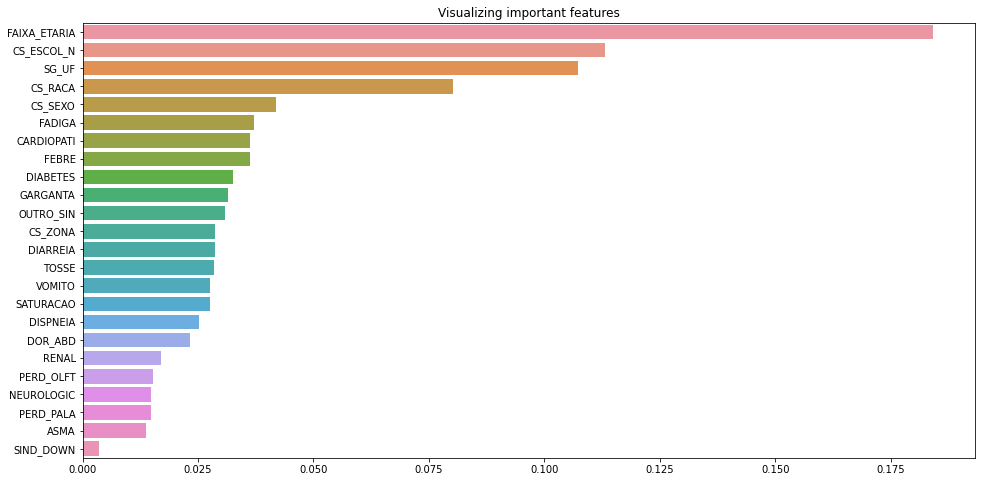

In [ ]:
visualiza_features_importantes(features_imp)

In [ ]:
#Selecionando uma arvore da floresta
# tree0 = ramdom_clf.estimators_[1]
# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = export_graphviz(
#           tree0,
#           max_depth = 6,
#           out_file = None,
#           feature_names = X_train.columns,
#           class_names = ['1','2','3','9'],
#           filled = True, rounded = True,
#           proportion = True,
#           node_ids = True,
#           rotate = False,
#           label = 'all',
#           special_characters = True,
# )
# graph = graphviz.Source(dot_data)
# graph.render('temp_img',format='png', view=False)

# Clusterização

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  """


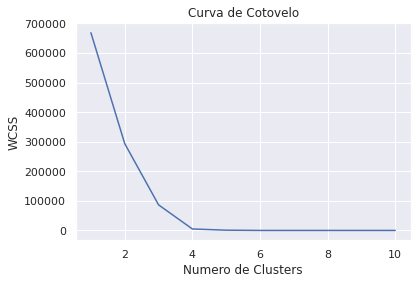

In [ ]:
# Descobri o melhor número de clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data[['EVOLUCAO', 'FADIGA']])
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
xFADIGA = data[['EVOLUCAO', 'FADIGA']]
xFEBRE = data[['EVOLUCAO', 'FEBRE']]
xGARGANTA = data[['EVOLUCAO', 'GARGANTA']]
y = data.EVOLUCAO

kmeans1 = cluster.KMeans(n_clusters=4)
kmeans1.fit(xFADIGA)
labelsKMEANS1 = kmeans1.labels_


In [ ]:
print(kmeans1.inertia_)

4880.994719087067


In [ ]:
print('HOMOGENETY')
print('Kmeans: %.3f' % metrics.homogeneity_score(y, labelsKMEANS1))

print('\nCOMPLETENESS')
print('Kmeans: %.3f' % metrics.completeness_score(y, labelsKMEANS1))

print('\nV-MEASURE')
print('Kmeans: %.3f' % metrics.v_measure_score(y, labelsKMEANS1))

HOMOGENETY
Kmeans: 0.974

COMPLETENESS
Kmeans: 0.544

V-MEASURE
Kmeans: 0.698

SILHOUETTE COEFFICIENT


KeyboardInterrupt: ignored

In [ ]:
kmeans2 = cluster.KMeans(n_clusters=4)
kmeans2.fit(xFEBRE)
labelsKMEANS2 = kmeans2.labels_

In [ ]:
print('HOMOGENETY')
print('Kmeans: %.3f' % metrics.homogeneity_score(y, labelsKMEANS2))

print('\nCOMPLETENESS')
print('Kmeans: %.3f' % metrics.completeness_score(y, labelsKMEANS2))

print('\nV-MEASURE')
print('Kmeans: %.3f' % metrics.v_measure_score(y, labelsKMEANS2))

HOMOGENETY
Kmeans: 0.974

COMPLETENESS
Kmeans: 0.485

V-MEASURE
Kmeans: 0.647


In [ ]:
kmeans3 = cluster.KMeans(n_clusters=4)
kmeans3.fit(xGARGANTA)
labelsKMEANS3 = kmeans3.labels_

In [ ]:
print('HOMOGENETY')
print('Kmeans: %.3f' % metrics.homogeneity_score(y, labelsKMEANS3))

print('\nCOMPLETENESS')
print('Kmeans: %.3f' % metrics.completeness_score(y, labelsKMEANS3))

print('\nV-MEASURE')
print('Kmeans: %.3f' % metrics.v_measure_score(y, labelsKMEANS3))

HOMOGENETY
Kmeans: 0.974

COMPLETENESS
Kmeans: 0.578

V-MEASURE
Kmeans: 0.726


In [ ]:
df1 = pd.DataFrame({'labels':labelsKMEANS1,"Evolução do caso": y})
ct1 = pd.crosstab(df1['labels'],df1['Evolução do caso'])
ct1

# 1 - Cura
# 2 - Óbito 
# 3 - Óbito por outras causas

Evolução do caso,1.0,2.0,3.0
labels,,,
0,0,435608,4113
1,825812,0,0
2,255109,0,0
3,0,118339,812


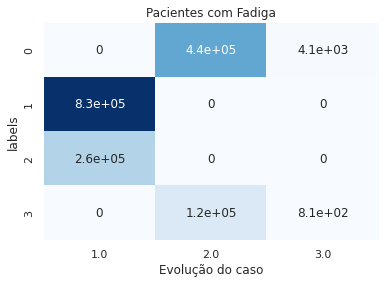

In [ ]:
plt.title("Pacientes com Fadiga")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

In [ ]:
df2 = pd.DataFrame({'labels':labelsKMEANS2,"Evolução do caso": y})
ct2 = pd.crosstab(df2['labels'],df2['Evolução do caso'])
ct2

Evolução do caso,1.0,2.0,3.0
labels,,,
0,442302,0,0
1,0,290149,1967
2,638619,0,0
3,0,263798,2958


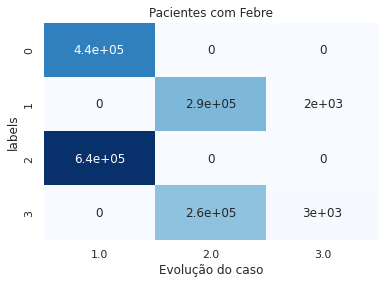

In [ ]:
plt.title("Pacientes com Febre")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

In [ ]:
df3 = pd.DataFrame({'Pacientes com Dor de garganta':labelsKMEANS3,"Pacientes com Febre": labelsKMEANS2})
ct3 = pd.crosstab(df3['Pacientes com Dor de garganta'],df3['Pacientes com Febre'])
ct3

Pacientes com Febre,0,1,2,3
Pacientes com Dor de garganta,,,,
0,0,156134,53255,0
1,245882,0,0,229319
2,0,482485,389047,0
3,20874,0,0,62797


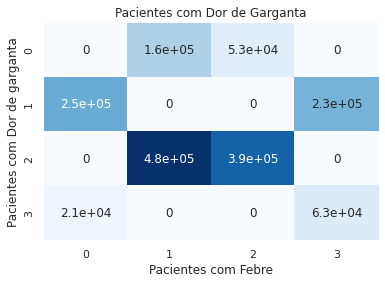

In [ ]:
plt.title("Pacientes com Dor de Garganta")
sns.heatmap(ct3,annot=True,cbar=False,cmap="Blues")